Task 1: Load and Split Dataset
• Use the California Housing dataset from sklearn.datasets.
• Split the dataset into **training (80%)** and **test (20%)** sets.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 1: Baseline Model (No Regularization) Build a Linear Regression model without
any regularization.
∗ Train the model on the training set.
∗ Observe the coefficients of the model.
∗ Compute the Mean Squared Error (MSE) on both training and test sets.
∗ This step helps to understand how a simple linear model behaves on the dataset and serves as
a baseline for comparison.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Model Coefficients: ")# Positive price increase, Negative price decrease
print(model.coef_)
print("Intercept: ")
print(model.intercept_)

Model Coefficients: 
[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: 
-37.02327770606391


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [ ]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)


Training MSE: 0.5179331255246699
Test MSE: 0.5558915986952422


Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune
hyperparameters for Ridge and Lasso regression models.
∗ Define a grid of alpha values (regularization strength).
∗ Run cross-validation on the training set to find the optimal alpha.
∗ Evaluate the model performance on the test set using MSE.
∗ This step demonstrates the importance of selecting appropriate hyperparameters to improve
generalization.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [ ]:
alpha_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}


In [ ]:
ridge = Ridge()

ridge_grid = GridSearchCV(
    ridge,
    alpha_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best alpha for Ridge:", ridge_grid.best_params_)


Best alpha for Ridge: {'alpha': 10}


In [ ]:
ridge_best = ridge_grid.best_estimator_

y_test_pred_ridge = ridge_best.predict(X_test)

ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)

print("Ridge Test MSE:", ridge_test_mse)


Ridge Test MSE: 0.5550405537342994


In [ ]:
lasso = Lasso(max_iter=10000)

lasso_grid = GridSearchCV(
    lasso,
    alpha_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

lasso_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best alpha for Lasso:", lasso_grid.best_params_)


Best alpha for Lasso: {'alpha': 0.001}


In [ ]:
lasso_best = lasso_grid.best_estimator_

y_test_pred_lasso = lasso_best.predict(X_test)

lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)

print("Lasso Test MSE:", lasso_test_mse)


Lasso Test MSE: 0.5538940157172418


In [ ]:
print("Baseline Test MSE:", test_mse)
print("Ridge Test MSE:", ridge_test_mse)
print("Lasso Test MSE:", lasso_test_mse)


Baseline Test MSE: 0.5558915986952422
Ridge Test MSE: 0.5550405537342994
Lasso Test MSE: 0.5538940157172418


– Step 3: Regularization Experiments (L1 vs L2) Train L1 (Lasso) and L2 (Ridge) regres-
sion models using the optimal hyperparameters.

∗ Compare the coefficients learned by both models. Notice that L1 tends to produce sparse
coefficients (some set to zero), while L2 shrinks coefficients without zeroing them.
∗ Evaluate and compare the MSE on training and test sets.
∗ Discuss the effect of regularization on the bias-variance tradeoff:
· How L1/L2 reduces variance and prevents overfitting.
· How excessive regularization may increase bias and underfit the data.
∗ Visualize the effect by plotting coefficients or training/test error versus alpha values (optional
but recommended).

In [ ]:
# Get best alpha values from GridSearchCV
best_alpha_ridge = ridge_grid.best_params_['alpha']
best_alpha_lasso = lasso_grid.best_params_['alpha']

# Train final models
ridge_final = Ridge(alpha=best_alpha_ridge)
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000)

ridge_final.fit(X_train, y_train)
lasso_final.fit(X_train, y_train)


Lasso(alpha=0.001, max_iter=10000)

In [ ]:
print("Ridge Coefficients:")
print(ridge_final.coef_)

print("\nLasso Coefficients:")
print(lasso_final.coef_)


Ridge Coefficients:
[ 4.47068597e-01  9.74130199e-03 -1.20293353e-01  7.66201258e-01
 -1.99123989e-06 -3.52184780e-03 -4.19720067e-01 -4.33421866e-01]

Lasso Coefficients:
[ 4.44698243e-01  9.78271615e-03 -1.15737191e-01  7.41172257e-01
 -1.85738492e-06 -3.50964130e-03 -4.18521643e-01 -4.31828076e-01]


In [ ]:
# Predictions
ridge_train_pred = ridge_final.predict(X_train)
ridge_test_pred = ridge_final.predict(X_test)

lasso_train_pred = lasso_final.predict(X_train)
lasso_test_pred = lasso_final.predict(X_test)

# MSE
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)

lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

print("Ridge Train MSE:", ridge_train_mse)
print("Ridge Test MSE:", ridge_test_mse)

print("\nLasso Train MSE:", lasso_train_mse)
print("Lasso Test MSE:", lasso_test_mse)


Ridge Train MSE: 0.5179417369316771
Ridge Test MSE: 0.5550405537342994

Lasso Train MSE: 0.5179897619159226
Lasso Test MSE: 0.5538940157172418


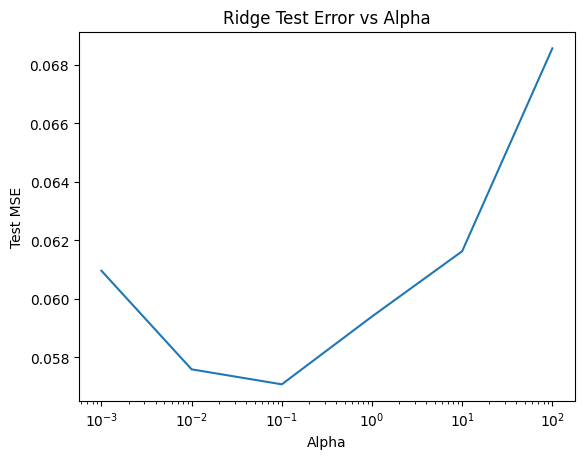

In [ ]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_errors = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    ridge_errors.append(mean_squared_error(y_test, pred))

plt.figure()
plt.plot(alphas, ridge_errors)
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Test MSE")
plt.title("Ridge Test Error vs Alpha")
plt.show()


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


4.2 Task 2: Complete all the Task
• Classification Task (Diabetes):
– Step 1: Baseline Model (No Regularization) Build a Logistic Regression model without
specifying any regularization (default settings).
∗ Train the model on the training set.
∗ Observe the coefficients of the model.
∗ Compute the accuracy on both training and test sets.
∗ This step serves as a baseline for comparison and helps to understand the behavior of a standard
logistic regression model on the dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
baseline_model = LogisticRegression(max_iter=10000)
baseline_model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [ ]:
print("Coefficients:")
print(baseline_model.coef_)
print("Intercept:")
print(baseline_model.intercept_)


Coefficients:
[[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]
Intercept:
[28.64871395]


In [ ]:
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Baseline Training Accuracy:", train_acc)
print("Baseline Test Accuracy:", test_acc)


Baseline Training Accuracy: 0.9582417582417583
Baseline Test Accuracy: 0.956140350877193


– Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune
hyperparameters for logistic regression models with regularization.
∗ Focus on tuning the C parameter (inverse of regularization strength) and the penalty type
(l1 or l2).
∗ Run cross-validation on the training set to identify the optimal hyperparameters.
∗ Evaluate the model performance on the test set using accuracy.

∗ This step demonstrates the importance of hyperparameter selection for improving model gen-
eralization.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


In [ ]:
log_reg = LogisticRegression(
    solver='liblinear',  # supports L1 and L2
    max_iter=10000
)

grid_search = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 100, 'penalty': 'l1'}


In [ ]:
best_model = grid_search.best_estimator_

y_test_best = best_model.predict(X_test)
best_test_acc = accuracy_score(y_test, y_test_best)

print("Best Model Test Accuracy:", best_test_acc)


Best Model Test Accuracy: 0.9824561403508771


– Step 3: Regularization Experiments (L1 vs L2) Train separate logistic regression models
using L1 (Lasso-like) and L2 (Ridge-like) regularization with the optimal hyperparameters.
∗ Compare the coefficients for L1 and L2. Observe that L1 tends to produce sparse coefficients
(some exactly zero), whereas L2 shrinks all coefficients but rarely sets them exactly to zero.
∗ Evaluate and compare accuracy on training and test sets.
∗ Discuss the effect of regularization on the bias-variance tradeoff:
· How L1/L2 reduces variance and mitigates overfitting.
· How overly strong regularization may increase bias, reducing accuracy.
∗ Optional: Visualize the coefficients or plot accuracy vs C values to better understand the
impact of L1 and L2 regularization.

In [ ]:
best_C = grid_search.best_params_['C']

log_l1 = LogisticRegression(
    C=best_C, penalty='l1', solver='liblinear', max_iter=10000
)

log_l2 = LogisticRegression(
    C=best_C, penalty='l2', solver='liblinear', max_iter=10000
)

log_l1.fit(X_train, y_train)
log_l2.fit(X_train, y_train)


LogisticRegression(C=100, max_iter=10000, solver='liblinear')

In [ ]:
print("L1 Coefficients:")
print(log_l1.coef_)

print("\nL2 Coefficients:")
print(log_l2.coef_)


L1 Coefficients:
[[ 7.44100983e-01 -1.08012965e-01  9.87215344e-02 -2.30841204e-03
   0.00000000e+00  4.72192590e+01 -1.17623400e+01 -1.36169952e+02
   1.97425735e+01  0.00000000e+00  0.00000000e+00  1.73046761e+00
   0.00000000e+00 -1.97757828e-01  0.00000000e+00  0.00000000e+00
   5.00524259e+01  0.00000000e+00  1.85046480e+01  0.00000000e+00
   1.93437735e-01 -4.39087869e-01  5.58764858e-02 -2.08005565e-02
  -2.18048099e+01  8.02262183e+00 -1.46711247e+01 -2.52551459e+01
  -2.53067158e+01  0.00000000e+00]]

L2 Coefficients:
[[ 5.40272741  0.26573732 -0.52651203 -0.02095479 -2.29922151 -0.2169419
  -3.56980218 -5.0110607  -2.26418385  0.36762747 -0.58036525  3.84169255
  -0.63875637 -0.10714305 -0.40591246  3.57237002  4.36577514 -0.26636925
   0.39354765  0.62630698 -0.20718582 -0.68999884  0.17661962 -0.01813087
  -4.67716843 -0.0140846  -4.46493229 -7.61271125 -6.83571871  0.57463274]]


In [ ]:
# L1 Accuracy
l1_train_acc = accuracy_score(y_train, log_l1.predict(X_train))
l1_test_acc = accuracy_score(y_test, log_l1.predict(X_test))

# L2 Accuracy
l2_train_acc = accuracy_score(y_train, log_l2.predict(X_train))
l2_test_acc = accuracy_score(y_test, log_l2.predict(X_test))

print("L1 Train Accuracy:", l1_train_acc)
print("L1 Test Accuracy:", l1_test_acc)

print("\nL2 Train Accuracy:", l2_train_acc)
print("L2 Test Accuracy:", l2_test_acc)


L1 Train Accuracy: 0.989010989010989
L1 Test Accuracy: 0.9824561403508771

L2 Train Accuracy: 0.9692307692307692
L2 Test Accuracy: 0.956140350877193


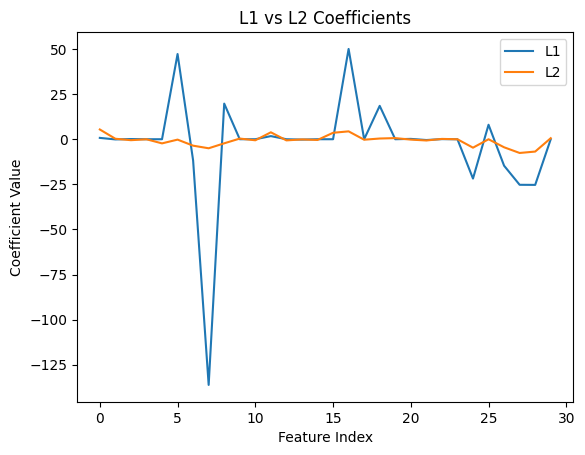

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(log_l1.coef_[0], label='L1')
plt.plot(log_l2.coef_[0], label='L2')
plt.legend()
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("L1 vs L2 Coefficients")
plt.show()

